In [1]:
# 🔹 1. Setup & Data Loading
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Optional validation split
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# 2. CNN-Based Model Architecture (Better for visual feature learning)
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# 3. Compile with Optimizer and Learning Rate Scheduling
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🔹 4. Train Model with Callbacks
history = model.fit(
    x_train[..., np.newaxis], y_train,
    validation_data=(x_val[..., np.newaxis], y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, lr_schedule]
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 87ms/step - accuracy: 0.7432 - loss: 0.9919 - val_accuracy: 0.8585 - val_loss: 0.5251 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.8602 - loss: 0.5314 - val_accuracy: 0.8697 - val_loss: 0.4600 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.8723 - loss: 0.4591 - val_accuracy: 0.8732 - val_loss: 0.4294 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.8789 - loss: 0.4287 - val_accuracy: 0.8670 - val_loss: 0.4553 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.8834 - loss: 0.4144 - val_accuracy: 0.8868 - val_loss: 0.3927 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.8869 - loss: 0.4058 - val_accuracy: 0.8948 - val_loss: 0.3789 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.8920 - l


Neural Network Performance:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Confusion Matrix:
 [[877   0  17  18   4   1  76   0   7   0]
 [  0 982   1  11   2   0   2   0   2   0]
 [ 16   1 884   8  48   0  43   0   0   0]
 [  7   3  10 930  23   0  26   0   1   0]
 [  1   0  31  19 896   0  50   0   3   0]
 [  0   0   0   0   0 984   0  13   0   3]
 [ 95   1  64  24  72   0 736   0   8   0]
 [  0   0   0   0   0   9   0 975   0  16]
 [  1   0   4   3   0   2   1   1 988   0]
 [  1   0   0   0   0   5   0  34   0 960]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8788    0.8770    0.8779      1000
           1     0.9949    0.9820    0.9884      1000
           2     0.8744    0.8840    0.8792      1000
           3     0.9181    0.9300    0.9240      1000
           4     0.8574    0.8960    0.8763      1000
           5     0.9830    0.9840    0.9835      1000
           6     0.7880    0.7360    0.7611      1000
           7     0.9531

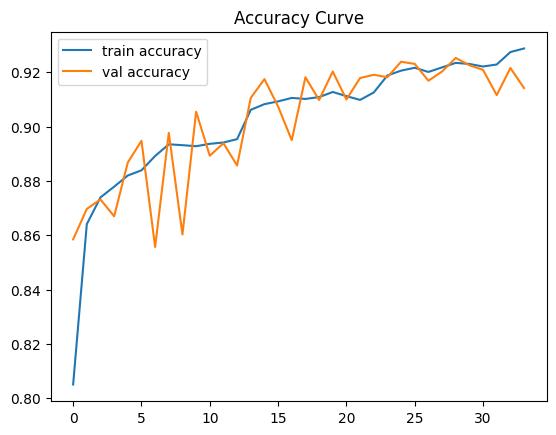

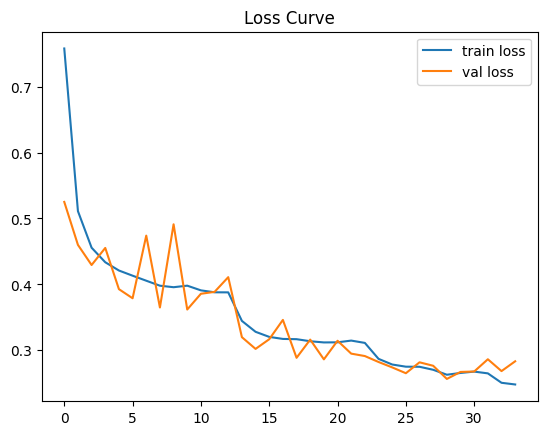

In [11]:
# 5. Evaluation Metrics
print("\nNeural Network Performance:")
y_pred = model.predict(x_test).argmax(axis=1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Visualize Training Curves
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

In [12]:
# 6. Comparison with Ensemble Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train.reshape(-1, 28*28), y_train)

RandomForestClassifier()

In [13]:
print("\nRandom Forest Performance:")
y_pred_rf = rf.predict(x_test.reshape(-1, 28*28))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, digits=4))


Random Forest Performance:
Confusion Matrix:
 [[853   0  15  30   2   1  85   0  14   0]
 [  3 959   2  25   4   0   6   0   1   0]
 [ 13   0 797  10 116   0  60   0   4   0]
 [ 19   4  15 904  28   0  27   0   3   0]
 [  1   1  93  38 813   0  52   0   2   0]
 [  0   0   0   1   0 954   0  31   2  12]
 [145   1 131  34  88   0 582   0  19   0]
 [  0   0   0   0   0  15   0 947   0  38]
 [  0   2   5   2   6   2   5   3 974   1]
 [  0   0   0   0   0   7   1  37   2 953]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8250    0.8530    0.8387      1000
           1     0.9917    0.9590    0.9751      1000
           2     0.7533    0.7970    0.7745      1000
           3     0.8659    0.9040    0.8845      1000
           4     0.7692    0.8130    0.7905      1000
           5     0.9745    0.9540    0.9641      1000
           6     0.7115    0.5820    0.6403      1000
           7     0.9303    0.9470    0.9386      1000
           

In [14]:
# Reflection
print("\nReflection:")
print("Tree-based models like Random Forest often outperform MLPs on structured data due to their ability to handle non-linearity, categorical splits, and data sparsity naturally. Neural networks may excel with large data and unstructured inputs like images.")



Reflection:
Tree-based models like Random Forest often outperform MLPs on structured data due to their ability to handle non-linearity, categorical splits, and data sparsity naturally. Neural networks may excel with large data and unstructured inputs like images.
